In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Task 1 -
Reading the data



In [2]:
df = pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.shape

(200, 6)

Pre-Processing

In [4]:
df.isnull().sum() 
#There are no null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.info()
#Sex, BP, Cholestrol and Drug are categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [7]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [9]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [10]:
df['Drug'].unique()
#5 unique values

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

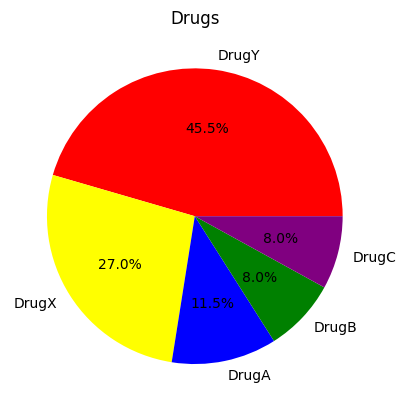

In [11]:
plt.pie(df.Drug.value_counts(),labels=['DrugY','DrugX','DrugA','DrugB','DrugC'],autopct = "%1.1f%%",colors = ['red','yellow','blue','green','purple'])
plt.title('Drugs')
plt.show()

Outlier Detection

<Axes: xlabel='Na_to_K'>

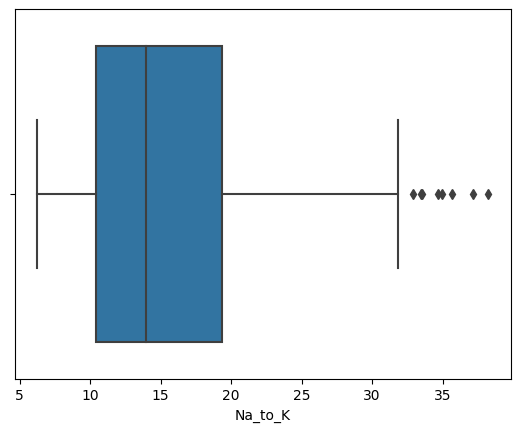

In [12]:
sns.boxplot(x=df.Na_to_K)

Outlier removal

In [13]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
q1, q3

(10.4455, 19.38)

In [14]:
IQR = q3 - q1
IQR

8.9345

In [15]:
ulim = q3+1.5*IQR
llim = q1-1.5*IQR
ulim, llim

(32.78175, -2.9562500000000007)

In [16]:
df2 = df[df.Na_to_K<ulim]

In [17]:
df2.shape #As we can see, this method removes some observations. So, we do not opt for this

(192, 6)

Outlier Replacement

In [18]:
df.median()

<ipython-input-18-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [19]:
df['Na_to_K'] = np.where(df['Na_to_K']>ulim,13.9365,df['Na_to_K'])

<Axes: xlabel='Na_to_K'>

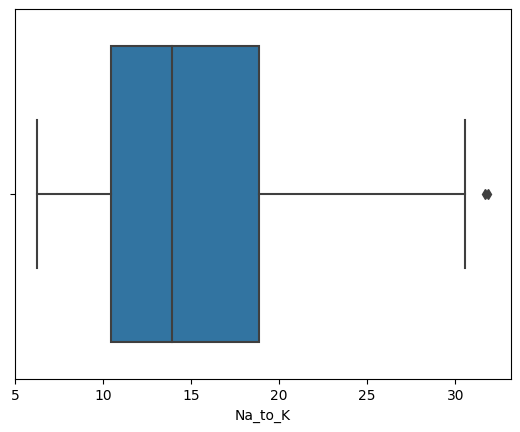

In [20]:
sns.boxplot(x=df.Na_to_K)

Encoding all Categorical data with Label Encoder

Encoding "Drug" with One-Hot Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [114]:
x=df.iloc[:,:5]
y=pd.get_dummies(df.iloc[:,5:]).values
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [115]:
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

#Task 2 -
Building the ANN Model

In [116]:
from sklearn.model_selection import train_test_split

Splitting dataframe for Training and Testing 

In [117]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,random_state=15)

In [118]:
x.shape, y.shape

((200, 5), (200, 5))

In [119]:
xtr.shape, xte.shape, ytr.shape, yte.shape

((160, 5), (40, 5), (160, 5), (40, 5))

In [128]:
yte

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Building layers of ANN

In [122]:
model = Sequential()

model.add(Dense(4,activation='relu'))

model.add(Dense(36,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(48,activation='relu'))

model.add(Dense(5,activation='softmax'))

Compiling all layers

In [123]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Training the model

In [124]:
model.fit(xtr,ytr,epochs=20,batch_size=8,validation_data=(xte,yte))

Epoch 1/20
20/20 [==============================] - 1s 11ms/step - loss: 1.8431 - accuracy: 0.2188 - val_loss: 1.3909 - val_accuracy: 0.4750
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 1.4477 - accuracy: 0.4125 - val_loss: 1.2882 - val_accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 1.3960 - accuracy: 0.4500 - val_loss: 1.2615 - val_accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 1.3304 - accuracy: 0.4500 - val_loss: 1.1630 - val_accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 1.2710 - accuracy: 0.4500 - val_loss: 1.0969 - val_accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 1.1959 - accuracy: 0.5063 - val_loss: 1.0914 - val_accuracy: 0.5250
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 1.1624 - accuracy: 0.5125 - val_loss: 1.0348 - val_accuracy: 0.5500
Epoch 8/20
20/20 [=

Predicting based on the independent testing data 

In [125]:
ypred = model.predict(xte)

2/2 [==============================] - 0s 7ms/step


Creating dataframes for actual category and predicted category

In [163]:
comp1 = pd.DataFrame(yte)
comp1.columns = ['DrugX(Actual)','DrugY','DrugA','DrugB','DrugC']
comp2 = pd.DataFrame(ypred)
comp2.columns = ['DrugX(Predicted)','DrugY','DrugA','DrugB','DrugC']
comp2 #This dataframe gives all of the predictions and their confidence values

,DrugX(Predicted),DrugY,DrugA,DrugB,DrugC
0,0.925694,0.021065,0.001276,0.014003,0.037962
1,0.253844,0.200831,0.106552,0.174443,0.264330
2,0.561312,0.139883,0.018067,0.072616,0.208121
3,0.819991,0.048222,0.002549,0.028553,0.100684
4,0.248860,0.164033,0.129678,0.160360,0.297069
5,0.434081,0.095844,0.058424,0.083203,0.328448
6,0.542046,0.136239,0.022476,0.102313,0.196926
7,0.641148,0.105538,0.011639,0.070953,0.170722
8,0.159544,0.113872,0.224206,0.166869,0.335508
9,0.975981,0.006043,0.000153,0.003476,0.014347


Comparing the predictions and actual categories

In [168]:
#Setting all max values in predicted dataframe to 1
comp2 = comp2.mask(comp2.eq(comp2.max(axis=1), axis=0), 1, axis=0) 
#Setting all other values to 0
comp2[comp2!=1] = 0

In [169]:
data = [comp1, comp2]
comp = pd.concat(data, axis=1)
comp

,DrugX(Actual),DrugY,DrugA,DrugB,DrugC,DrugX(Predicted),DrugY,DrugA,DrugB,DrugC
0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
5,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
6,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
7,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
8,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0
9,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0


#Task 3 - 
Predict using random data


In [167]:
model.predict([[24,1,2,0,16.54]])

1/1 [==============================] - 0s 442ms/step


array([[0.8633632 , 0.03968258, 0.00333419, 0.02765957, 0.0659604 ]],
      dtype=float32)

In [ ]:
#Testing model with random values, DrugX has the most probability(0.86)